In [26]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [27]:
# Input the dataset
house_dataset = [
    {"id": 1, "price": 135, "size": 120, "Mid_Family": "N"},
    {"id": 2, "price": 560, "size": 600, "Mid_Family": "N"},
    {"id": 3, "price": 290, "size": 200, "Mid_Family": "Y"},
    {"id": 4, "price": 650, "size": 230, "Mid_Family": "N"},
    {"id": 5, "price": 320, "size": 340, "Mid_Family": "Y"},
    {"id": 6, "price": 120, "size": 450, "Mid_Family": "N"},
    {"id": 7, "price": 440, "size": 320, "Mid_Family": "Y"},
    {"id": 8, "price": 510, "size": 110, "Mid_Family": "N"},
    {"id": 9, "price": 250, "size": 500, "Mid_Family": "N"},
    {"id": 10, "price": 380, "size": 220, "Mid_Family": "Y"}
]

In [64]:
# Specific Hypothesis
min_price_s = min(d['price'] for d in positive_instances)
max_price_s = max(d['price'] for d in positive_instances)
min_size_s = min(d['size'] for d in positive_instances)
max_size_s = max(d['size'] for d in positive_instances)


In [71]:
# General Hypothesis
min_price_g = 121  # As lower as possible
max_price_g = 649  # As higher as possible
min_size_g = 121  # As lower as possible
max_size_g = 499  # As higher as possible

/var/folders/6c/5fgpvxm14d12fq7drd1sdsj00000gn/T/ipykernel_67975/3785985299.py:17: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  patches.Patch(color='b', edgecolor='b', label='Specific Hypothesis', fill=False),
/var/folders/6c/5fgpvxm14d12fq7drd1sdsj00000gn/T/ipykernel_67975/3785985299.py:18: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  patches.Patch(color='g', edgecolor='g', label='General Hypothesis', fill=False)


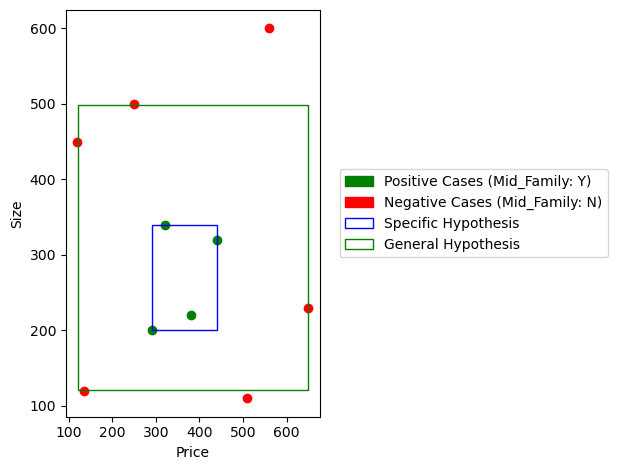

In [79]:
fig, ax = plt.subplots()

for data in house_dataset:
    color = 'green' if data['Mid_Family'] == 'Y' else 'red'
    ax.scatter(data['price'], data['size'], c=color)

rect_s = patches.Rectangle((min_price_s, min_size_s), max_price_s - min_price_s, max_size_s - min_size_s, linewidth=1, edgecolor='b', facecolor='none')
ax.add_patch(rect_s)

rect_g = patches.Rectangle((min_price_g, min_size_g), max_price_g - min_price_g, max_size_g - min_size_g, linewidth=1, edgecolor='g', facecolor='none')
ax.add_patch(rect_g)

# Define patches for the legend
legend_patches = [
    patches.Patch(color='green', label='Positive Cases (Mid_Family: Y)'),
    patches.Patch(color='red', label='Negative Cases (Mid_Family: N)'),
    patches.Patch(color='b', edgecolor='b', label='Specific Hypothesis', fill=False),
    patches.Patch(color='g', edgecolor='g', label='General Hypothesis', fill=False)
]

plt.xlabel('Price')
plt.ylabel('Size')
plt.legend(handles=legend_patches, bbox_to_anchor=(1.05, 0.5), loc='center left')
plt.tight_layout()  # To ensure nothing is clipped
plt.show()

In [100]:
import seaborn as sns
import pandas as pd
import numpy as np

In [96]:
# Load the Excel file
filepath = '/Users/shebanaderzad/Documents/DSCI_550/Grade.xlsx'
df = pd.read_excel(filepath)

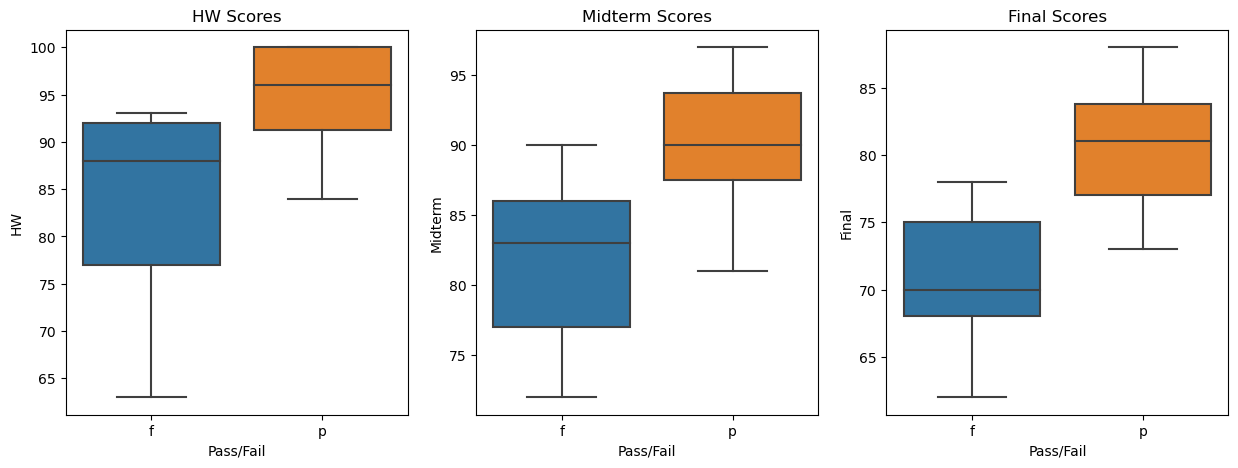

In [97]:
# Box plots
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='Pass/Fail', y='HW', data=df)
plt.title('HW Scores')

plt.subplot(1, 3, 2)
sns.boxplot(x='Pass/Fail', y='Midterm', data=df)
plt.title('Midterm Scores')

plt.subplot(1, 3, 3)
sns.boxplot(x='Pass/Fail', y='Final', data=df)
plt.title('Final Scores')

plt.show()

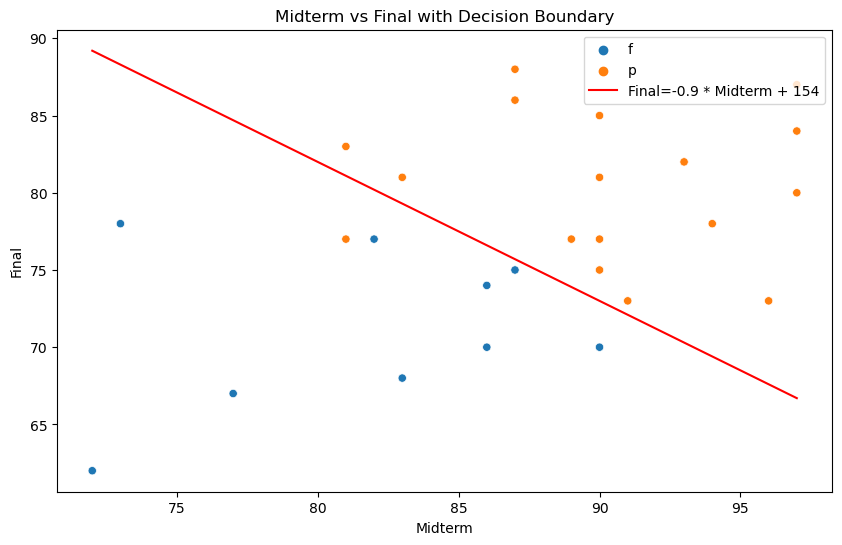

In [108]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Midterm', y='Final', hue='Pass/Fail', data=df)

# Drawing a manual decision boundary
m = -0.9  # Slope of the line
c = 154  # y-intercept of the line. You need to adjust this value based on your data.
x = np.linspace(min(df['Midterm']), max(df['Midterm']), 100)  # Generating x values
y = m * x + c  # Calculating corresponding y values
plt.plot(x, y, '-r', label=f'Final={m} * Midterm + {c}')

plt.xlabel('Midterm')
plt.ylabel('Final')
plt.title('Midterm vs Final with Decision Boundary')
plt.legend(loc='upper right')
plt.show()

In [92]:
# Extracting features and labels for passed and failed students
hw_pass = df.loc[df['Pass/Fail'] == 'p', 'HW'].tolist()
midterm_pass = df.loc[df['Pass/Fail'] == 'p', 'Midterm'].tolist()

hw_fail = df.loc[df['Pass/Fail'] == 'f', 'HW'].tolist()
midterm_fail = df.loc[df['Pass/Fail'] == 'f', 'Midterm'].tolist()

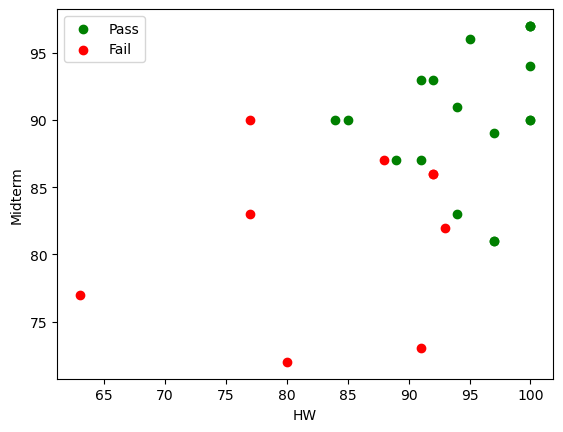

In [93]:
# Plotting the data points
plt.scatter(hw_pass, midterm_pass, color='g', label='Pass')
plt.scatter(hw_fail, midterm_fail, color='r', label='Fail')

plt.xlabel('HW')
plt.ylabel('Midterm')
plt.legend()
plt.show()